In [41]:
import numpy as np
import sys
sys.path.append("../")
import SRT_optimization as srt
import matplotlib.pyplot as plt

In [2]:
NESG_targets={}
with open('globular_proteins.dat','r') as f:
    for line in f:
        if line.startswith('#'):
            pass
        else:
            data=line.split()
            NESG_targets[data[0]]={}
            NESG_targets[data[0]]['MW']=float(data[2])
            NESG_targets[data[0]]['T1']=float(data[3])
            NESG_targets[data[0]]['T2']=float(data[4])
            NESG_targets[data[0]]['corrT']=float(data[6])

In [3]:
NESG_targets

{'PsR76A': {'MW': 7.2, 'T1': 478.0, 'T2': 128.0, 'corrT': 5.1},
 'VfR117': {'MW': 11.2, 'T1': 605.0, 'T2': 119.0, 'corrT': 6.3},
 'SyR11': {'MW': 12.4, 'T1': 630.0, 'T2': 104.0, 'corrT': 7.1},
 'ER541-37-162': {'MW': 15.8, 'T1': 729.0, 'T2': 66.5, 'corrT': 10.0},
 'ER540': {'MW': 18.8, 'T1': 909.0, 'T2': 66.5, 'corrT': 11.3},
 'SoR190': {'MW': 13.8, 'T1': 697.5, 'T2': 100.9, 'corrT': 7.7},
 'TR80': {'MW': 10.5, 'T1': 612.8, 'T2': 102.9, 'corrT': 7.0},
 'Ubiquitin': {'MW': 9.0, 'T1': 441.8, 'T2': 144.6, 'corrT': 4.4},
 'HR2873B': {'MW': 10.7, 'T1': 492.0, 'T2': 115.0, 'corrT': 5.7},
 'B-domain': {'MW': 7.2, 'T1': 423.5, 'T2': 153.3, 'corrT': 4.05},
 'BcR97A': {'MW': 13.1, 'T1': 705.8, 'T2': 80.6, 'corrT': 8.8},
 'PfR193A': {'MW': 13.6, 'T1': 733.9, 'T2': 80.9, 'corrT': 9.0},
 'MvR76': {'MW': 20.2, 'T1': 1015.0, 'T2': 64.5, 'corrT': 12.2},
 'DvR115G': {'MW': 10.9, 'T1': 608.7, 'T2': 115.6, 'corrT': 6.5},
 'MrR110B': {'MW': 11.8, 'T1': 707.0, 'T2': 99.2, 'corrT': 7.8},
 'VpR247': {'MW': 1

In [45]:
nu_N=0
for protein,data in NESG_targets.items():
    print(np.sqrt(6*data['T1']/data['T2']-7)/(4*np.pi*data['corrT']*10**(-9)))
    nu_N+=(np.sqrt(6*data['T1']/data['T2']-7))/(4*np.pi*data['corrT']*10**(-9))/len(NESG_targets)
print(f'nu_N: {nu_N}')

61244688.537164114
61238189.0296029
60716591.36654701
61007660.54650734
60993823.42022128
60682339.5547393
60935916.8892931
60882123.01556322
60322923.67451021
60801216.770046435
61025096.24904496
60894059.12305778
60986293.62227959
60713642.93241942
61010842.234176725
60880465.07797666
60749689.17993713
81254039.56774645
60568999.869445205
60417919.59317727
nu_N: 61866326.012672804


In [27]:
gammaN=-27.166*10**6;
gammaH=267.513*10**6;
magnetic_field = nu_N / gammaN
print(magnetic_field*gammaH/10**6)

-609.2191147253235


In [10]:
magn_field_MHz=600 # for values in MHz
magnetic_field=magn_field_MHz*2*np.pi/gammaH*10**6

In [12]:
gammaH * magnetic_field/2/np.pi

600000000.0

  5.10   4.52
  6.30   4.98
  7.10   5.92
 10.00   9.93
 11.30   9.93
  7.70   6.15
  7.00   5.99
  4.40   3.84
  5.70   5.23
  4.05   3.54
  8.80   8.00
  9.00   7.98
 12.20  10.27
  6.50   5.18
  7.80   6.27
  8.05   7.21
  7.20   5.92
 13.00  14.03
 10.60   9.23
  6.60   6.20


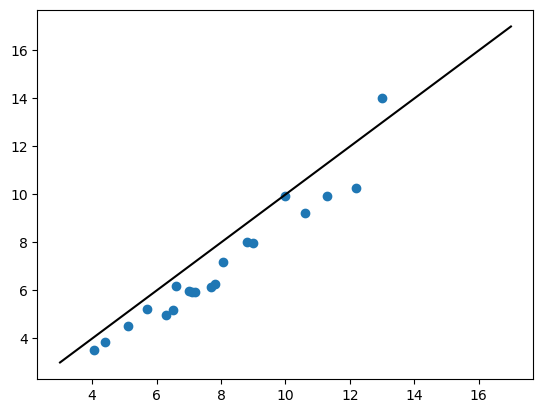

In [46]:
for protein,data in NESG_targets.items():
    nu_N=np.sqrt(6*data['T1']/data['T2']-7)/(4*np.pi*data['corrT']*10**(-9))
    magn_field_MHz=(-1)* nu_N / gammaN *gammaH/10**6 
    print(f"{data['corrT']:>6.2f} {srt.find_tau_from_R2_np_poly1d(magn_field_MHz,1/data['T2']*1000)*10**9:>6.2f}")
    NESG_targets[protein]['app_effT']=srt.find_tau_from_R2_np_poly1d(magn_field_MHz,1/data['T2']*1000)*10**9
    plt.plot(data['corrT'],NESG_targets[protein]['app_effT'],'o',c='C0')

plt.plot([3,17],[3,17],'-',c='black')